In [1]:
# Name: Deepu Singh 
# Roll No: M22AI548

import numpy as np #used for scientific calculation
import tensorflow as tf # 
from tensorflow import keras # interface for tensarflow
import pandas as pd # data manupulation and there used case 
from matplotlib import pyplot as plt # to visualize graph
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [2]:

# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join('D:\\ML_assigment\\', 'train', str(label))
 # Loop over each image in the folder
 for file in os.listdir(folder_path):
     file_path = os.path.join(folder_path, file)
     if file_path.endswith(('.tiff','.bmp')):
         # Load the image and resize it to the desired size
         img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
         img = cv2.resize(img, img_size)
         # Append the image and label to the lists
         images.append(img)
         labels.append(label)


In [4]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [6]:

# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join('D:\\ML_assigment\\', 'val\\', str(label))

 # Loop over each image in the folder
 for file in os.listdir(folder_path):
     file_path = os.path.join(folder_path, file)
     if file_path.endswith(('.tiff','.bmp')):
         # Load the image and resize it to the desired size
         img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
         img = cv2.resize(img, img_size_val)
         # Append the image and label to the lists
         images_val.append(img)
         labels_val.append(label)

In [7]:
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [8]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


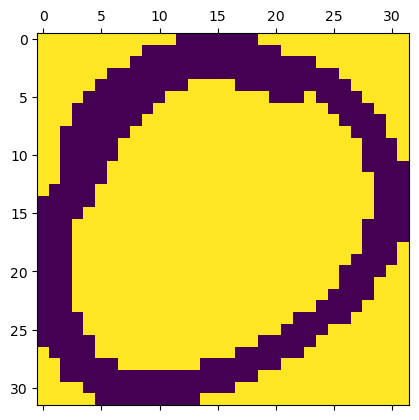

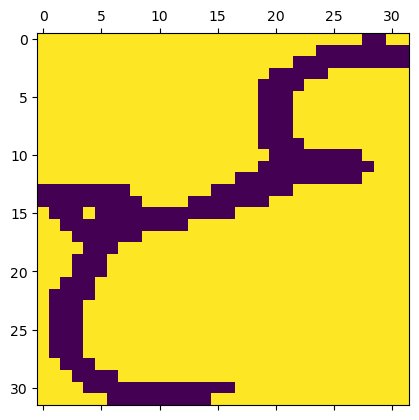

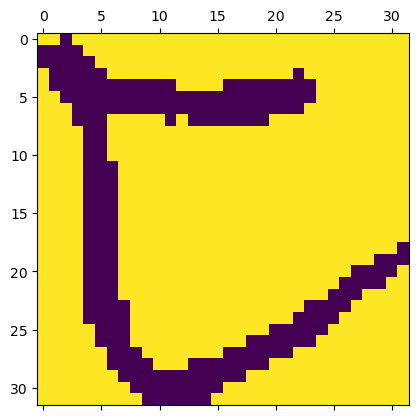

In [9]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [10]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid

model = keras.Sequential([
 keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 165.8806 - accuracy: 0.4030 - val_loss: 66.5523 - val_accuracy: 0.5618
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 28.9688 - accuracy: 0.7820 - val_loss: 33.2288 - val_accuracy: 0.6854
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 14.0888 - accuracy: 0.8650 - val_loss: 27.8346 - val_accuracy: 0.7472
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 10.1160 - accuracy: 0.9120 - val_loss: 18.2050 - val_accuracy: 0.8764
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 8.8880 - accuracy: 0.9180 - val_loss: 24.4266 - val_accuracy: 0.8315
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 3.7857 - accuracy: 0.9450 - val_loss: 24.7143 - val_accuracy: 0.8764
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1167 - accuracy: 0.9520 - val_loss: 20.6993 - val_accuracy: 0.8764
Epoch 8

In [11]:
# Observation : we see a better accuracy from the 2nd iteration
# now scale and try to check the accuracy, divide dataset by 255 
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7088 - accuracy: 0.9570 - val_loss: 0.9879 - val_accuracy: 0.7921
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.9410 - val_loss: 0.9607 - val_accuracy: 0.8371
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.9580 - val_loss: 0.9370 - val_accuracy: 0.8539
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.9740 - val_loss: 0.9203 - val_accuracy: 0.8820
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6565 - accuracy: 0.9810 - val_loss: 0.9063 - val_accuracy: 0.8989
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.9880 - val_loss: 0.8952 - val_accuracy: 0.9045
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.9910 - val_loss: 0.8870 - val_accuracy: 0.8989
Epoch 8/10
32/32 [==

In [12]:
# Observation : we got better result for all iterations on scaling the training dataset
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.8669 - accuracy: 0.8989


[0.8669049739837646, 0.898876428604126]

In [16]:
x_test_scaled

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0.

6/6 [==============================] - 0s 3ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


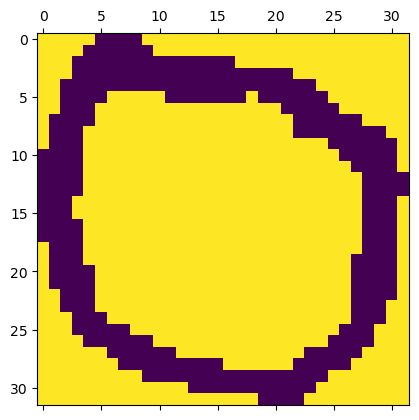

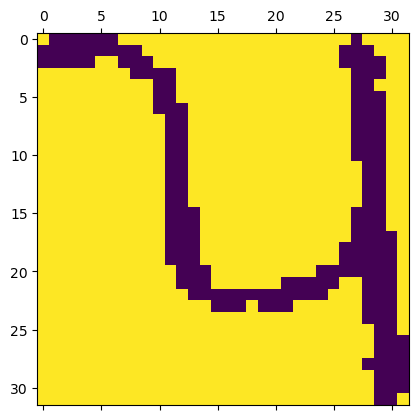

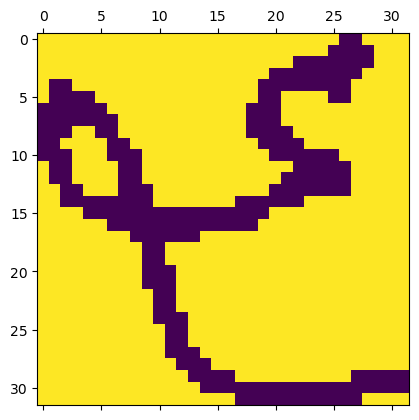

In [18]:
# Observation : result almost same as the training dataset,
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [14]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 5, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 7, 2, 2, 9, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 3, 4, 6, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[16,  0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0, 10,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  1,  0,  2],
       [ 0,  0,  2, 14,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 16,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

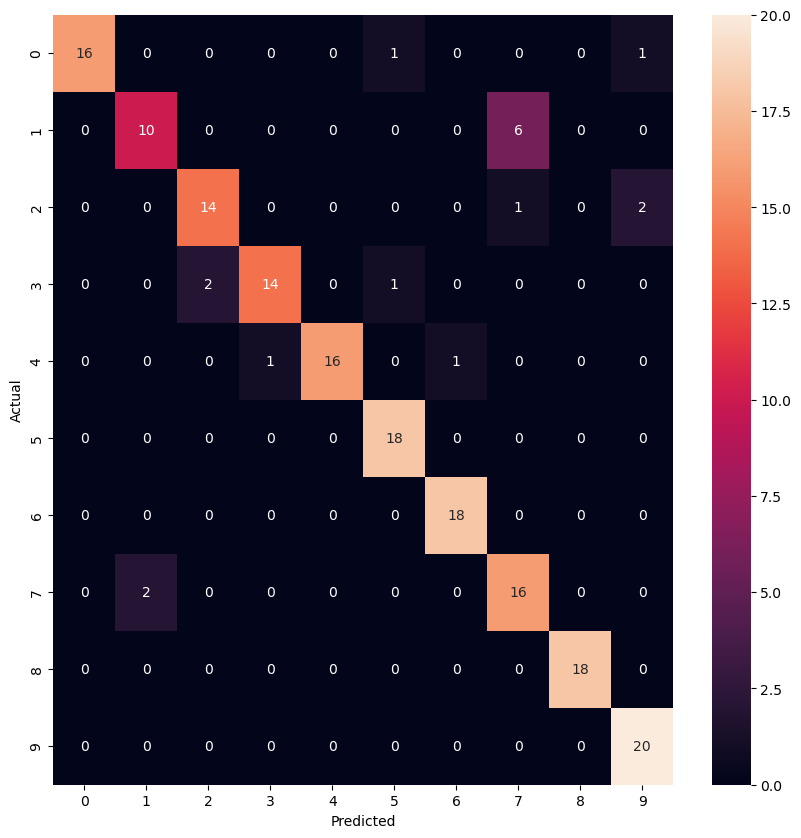

In [15]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')